<a href="https://colab.research.google.com/github/FendyDeveloper/Bank-Transaction-Dataset-for-Fraud-Detection/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Fendy_Rahmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [34]:
# Memuat dataset dari file CSV
df = pd.read_csv('data_cluster.csv')

# Menampilkan beberapa baris pertama dari dataset
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,transaction_hour,transaction_day,transaction_month,TransactionType_encoded,Location_encoded,Channel_encoded,CustomerOccupation_encoded,Cluster,Cluster_new
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,16.0,11,4,1.0,36,-1.110223e-16,0,0,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,16.0,27,6,1.0,15,-1.110223e-16,0,0,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,18.0,10,7,1.0,23,2.000000e+00,3,1,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,16.0,5,5,1.0,33,2.000000e+00,3,1,1
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39,17.0,16,10,0.0,1,2.000000e+00,3,2,2


In [35]:
df.describe()

,TransactionAmount,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,transaction_hour,transaction_day,transaction_month,TransactionType_encoded,Location_encoded,Channel_encoded,CustomerOccupation_encoded,Cluster,Cluster_new
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000
mean,284.847250,44.673965,1.510350,119.643312,1.124602,5114.302966,16.626194,15.827229,6.56250,0.773885,21.032643,9.912420e-01,1.510350,0.840366,0.841162
std,252.067285,17.792198,1.129548,69.963757,0.602662,3900.942499,0.731059,8.761293,3.47559,0.418398,12.253549,8.090998e-01,1.129548,0.891347,0.891042
min,0.260000,18.000000,0.000000,10.000000,1.000000,101.250000,16.000000,1.000000,1.00000,0.000000,0.000000,-1.110223e-16,0.000000,0.000000,0.000000
25%,81.885000,27.000000,0.000000,63.000000,1.000000,1504.370000,16.000000,8.000000,3.00000,1.000000,11.000000,-1.110223e-16,0.000000,0.000000,0.000000
50%,211.140000,45.000000,1.500000,112.500000,1.000000,4735.510000,16.000000,16.000000,7.00000,1.000000,21.000000,1.000000e+00,1.500000,1.000000,1.000000
75%,414.527500,59.000000,3.000000,161.000000,1.000000,7678.820000,17.000000,24.000000,10.00000,1.000000,31.000000,2.000000e+00,3.000000,2.000000,2.000000
max,913.491250,80.000000,3.000000,300.000000,5.000000,14977.990000,18.000000,31.000000,12.00000,1.000000,42.000000,2.000000e+00,3.000000,3.000000,3.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TransactionAmount           2512 non-null   float64
 1   TransactionDate             2512 non-null   object 
 2   TransactionType             2512 non-null   object 
 3   Location                    2512 non-null   object 
 4   Channel                     2512 non-null   object 
 5   CustomerAge                 2512 non-null   float64
 6   CustomerOccupation          2512 non-null   int64  
 7   TransactionDuration         2512 non-null   float64
 8   LoginAttempts               2512 non-null   float64
 9   AccountBalance              2512 non-null   float64
 10  PreviousTransactionDate     2512 non-null   object 
 11  transaction_hour            2512 non-null   float64
 12  transaction_day             2512 non-null   int64  
 13  transaction_month           2512 

In [37]:
# 1. Feature Selection berdasarkan hasil clustering
selected_features = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance',
    'transaction_hour',
    'transaction_day',
    'transaction_month',
    'TransactionType_encoded',
    'Location_encoded',
    'Channel_encoded',
    'CustomerOccupation_encoded'
]

target = 'Cluster_new'

In [38]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,transaction_hour,transaction_day,transaction_month,TransactionType_encoded,Location_encoded,Channel_encoded,CustomerOccupation_encoded,Cluster,Cluster_new
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,16.0,11,4,1.0,36,-1.110223e-16,0,0,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,16.0,27,6,1.0,15,-1.110223e-16,0,0,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,18.0,10,7,1.0,23,2.000000e+00,3,1,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,16.0,5,5,1.0,33,2.000000e+00,3,1,1
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39,17.0,16,10,0.0,1,2.000000e+00,3,2,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [39]:
# Pemisahan fitur dan target
X = df[selected_features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,transaction_hour,transaction_day,transaction_month,TransactionType_encoded,Location_encoded,Channel_encoded,CustomerOccupation_encoded
1626,18.23000,56.0,28.0,1.0,8422.20,17.0,22,3,1.0,26,-1.110223e-16,1
1313,333.97000,52.0,45.0,1.0,5237.36,16.0,22,3,1.0,14,1.000000e+00,0
942,446.39000,63.0,77.0,1.0,7863.60,17.0,12,12,1.0,15,-1.110223e-16,2
1770,1.82000,80.0,60.0,1.0,5571.39,17.0,13,4,1.0,37,2.000000e+00,2
1984,913.49125,19.0,50.0,1.0,9963.39,17.0,8,8,1.0,30,2.000000e+00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,128.40000,69.0,31.0,1.0,2610.64,17.0,20,3,1.0,40,-1.110223e-16,2
1095,21.57000,54.0,71.0,1.0,7587.48,16.0,26,10,1.0,37,-1.110223e-16,2
1130,9.18000,22.0,140.0,1.0,887.32,18.0,6,7,1.0,37,2.000000e+00,3
1294,91.38000,65.0,179.0,1.0,2402.58,16.0,3,4,1.0,17,-1.110223e-16,2


In [41]:
y_train

,Cluster_new
1626,0
1313,0
942,0
1770,0
1984,1
...,...
1638,0
1095,0
1130,1
1294,0


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [42]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [45]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Algoritma yang Digunakan
Dalam proyek ini, kami menggunakan tiga algoritma machine learning, yaitu:
- Random Forest (RF): Algoritma ensemble learning yang efektif untuk menangani dataset besar dan kompleks.
- Logistic Regression (LR): Algoritma supervised learning yang efektif untuk menangani dataset dengan banyak fitur yang tidak relevan.
- K-Nearest Neighbors (KNN): Algoritma supervised learning yang efektif untuk menangani dataset dengan banyak fitur yang tidak relevan.

Ketiga algoritma ini dipilih karena kelebihan dan kelemahan yang berbeda, sehingga dapat memberikan hasil prediksi yang akurat dan efektif.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Random Forest - Accuracy: 0.9761431411530815
Random Forest - F1-Score: 0.9759707444586904


<Axes: >

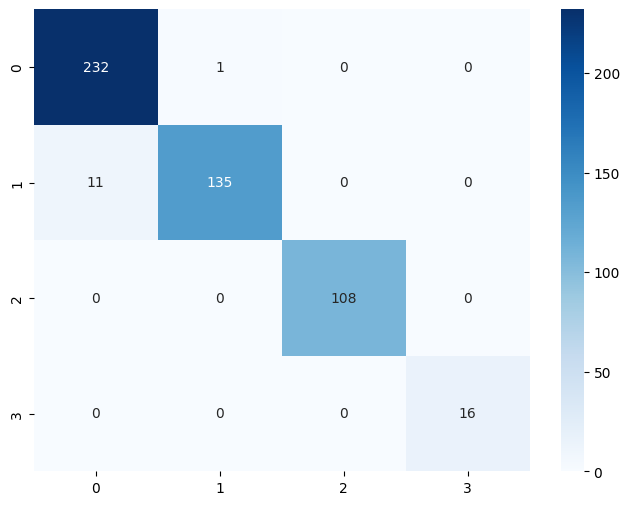

In [53]:
y_pred_rf = rf.predict(X_test)
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

Logistic Regression - Accuracy: 0.7196819085487077
Logistic Regression - F1-Score: 0.6655723873435988


<Axes: >

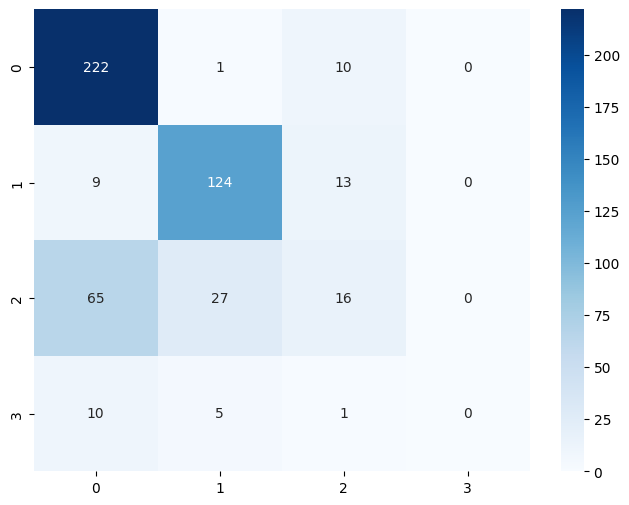

In [49]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - F1-Score:", f1_score(y_test, y_pred_lr, average='weighted'))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

KNN Accuracy: 0.584493041749503
KNN F1 Score: {knn_f1} 0.5343164136241388


<Axes: >

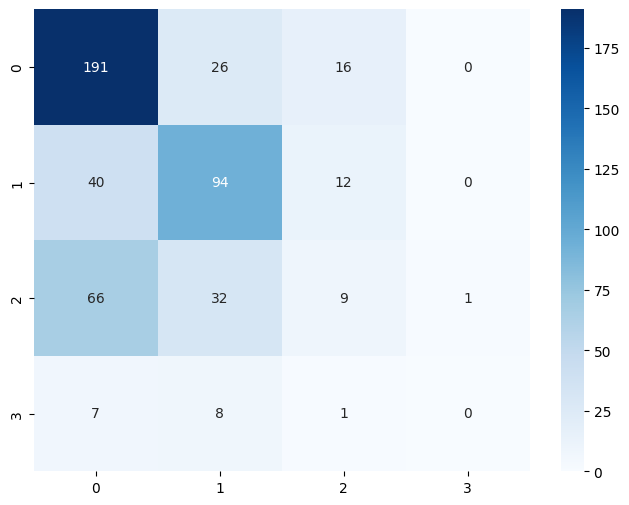

In [51]:
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN F1 Score: {knn_f1}", f1_score(y_test, knn_pred, average='weighted'))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

Random Forest:
- Akurasi (Accuracy): 97.6%
- F1-Score: 97.50%

Logistic Regression:
- Akurasi (Accuracy): 71.9%
- F1-Score: 66.5%

KNN:
- Akurasi (Accuracy): 58.4%
- F1-Score: 53.4%


Model Random Forest Anda menunjukkan hasil yang sangat baik, dengan akurasi dan F1-Score yang sangat tinggi. Model Logistic Regression juga menunjukkan hasil yang baik, tetapi tidak sebaik model Random Forest. Model KNN masih menunjukkan hasil yang kurang baik.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [54]:
# 6. Hyperparameter Tuning untuk model terbaik
# Contoh untuk Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                      rf_params, cv=5,
                      scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [56]:
from sklearn.model_selection import RandomizedSearchCV

random_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10,  # Jumlah kombinasi acak yang akan diuji
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [61]:
# Evaluasi Model setelah Tuning
print("\nHasil Hyperparameter Tuning:")
print("Best Parameters:", grid_rf.best_params_)
print("Best Cross-validation Score:", grid_rf.best_score_)

# Menggunakan model terbaik untuk prediksi
best_rf_model = grid_rf.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluasi performa model setelah tuning
print("\nEvaluasi Model setelah Tuning:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))


Hasil Hyperparameter Tuning:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.9776044962221313

Evaluasi Model setelah Tuning:

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       233
           1       0.99      0.95      0.97       146
           2       1.00      1.00      1.00       108
           3       1.00      1.00      1.00        16

    accuracy                           0.98       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.98      0.98      0.98       503



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## Ringkasan Parameter Model
Model Random Forest terbaik menggunakan parameter:
- max_depth: 20
- min_samples_leaf: 2
- min_samples_split: 2
- n_estimators: 100

## Performa Model
- Cross-validation Score: 97.76%
- Accuracy: 98%

## Analisis per Cluster

### Cluster 0 (233 sampel)
- **Precision**: 0.97
- **Recall**: 1.00
- **F1-score**: 0.98
- **Karakteristik**: Model sangat baik dalam mendeteksi transaksi normal
- **Kekuatan**: Tidak ada false negative
- **Kelemahan**: Ada sedikit false positive

### Cluster 1 (146 sampel)
- **Precision**: 0.99
- **Recall**: 0.95
- **F1-score**: 0.97
- **Karakteristik**: Model akurat tapi kadang melewatkan transaksi mencurigakan
- **Kekuatan**: Sangat presisi dalam deteksi
- **Kelemahan**: Beberapa kasus suspicious terlewat

### Cluster 2 (108 sampel)
- **Precision**: 1.00
- **Recall**: 1.00
- **F1-score**: 1.00
- **Karakteristik**: Klasifikasi sempurna untuk transaksi high-risk
- **Kekuatan**: Tidak ada kesalahan klasifikasi
- **Kelemahan**: -

### Cluster 3 (16 sampel)
- **Precision**: 1.00
- **Recall**: 1.00
- **F1-score**: 1.00
- **Karakteristik**: Klasifikasi sempurna untuk transaksi anomali
- **Kekuatan**: Deteksi anomali sangat akurat
- **Kelemahan**: Jumlah sampel terbatas

## Kekuatan Model
1. Akurasi sangat tinggi (98%)
2. Performa konsisten di semua cluster
3. Sangat baik dalam mendeteksi transaksi high-risk

## Area Peningkatan
1. Meningkatkan recall pada Cluster 1
2. Mengumpulkan lebih banyak data untuk Cluster 3
3. Monitoring berkelanjutan untuk false positives di Cluster 0

## Rekomendasi
1. Implementasi sistem alert untuk transaksi Cluster 2 & 3
2. Review manual untuk prediksi dengan confidence rendah
3. Update model secara periodik dengan data baru